In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# define loss function
class My_loss(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x, y):
        return torch.mean(torch.pow((x - y), 2))
    
def f(x):
    return (1+np.pi**2)*np.cos(np.pi*x)

def u(x):
    return np.cos(np.pi*x)

In [79]:
# define model
class My_model(nn.Module):
    def __init__(self,hidden_layer1th):
        super().__init__()
        self.fc1 = nn.Linear(1,hidden_layer1th)
        self.fc2 = nn.Linear(hidden_layer1th,1)
    def forward(self,x):
        out = self.fc1(x)#xsize x hidden_layer1th
        out = F.relu(out)
        out = self.fc2(out)#xsize x 1
        out = F.relu(out)
        return out
    
def compute_second_order_derivative(model, inputs):
    # Set inputs to require gradient
    inputs.requires_grad = True
    N = inputs.size()[0]
    second_order_gradients = torch.zeros(N,1,dtype=torch.float32)#,requires_grad=True)
    for x in range(N):
        # Forward pass to compute first-order derivatives
        y = model(inputs[x])
        first_order_gradients = torch.autograd.grad(y, inputs[x], create_graph=True)[0]
        # Compute second-order derivatives using autograd
        second_order_gradients[x] = torch.autograd.grad(first_order_gradients, inputs[x], create_graph=True)[0]
    
    return second_order_gradients

In [80]:
# Hyper-parameters
N = 500
# width of 1th hidden layer
hidden_layer1th = 50
learning_rate = 0.01
DEVICE = torch.device("cpu")

# architecture
nodes = torch.zeros(N,1,dtype=torch.float32)
nodes_np = np.linspace(0,1,N)
for i in range(N):
    nodes[i] = nodes_np[i];
targets = f(nodes)

criterion = My_loss()
model = My_model(hidden_layer1th).to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [81]:
h = 1e-3
num_epochs = 1200
# define train
def train(model, device, optimizer, epoch):
    model.train()
    # uN-uN'' on each nodes
    outputs = model(nodes) - compute_second_order_derivative(model, nodes)
    #outputs -= (model(nodes-h)-2*model(nodes)+model(nodes+h))/h**2
    # targets = f(nodes)
    loss = criterion(outputs, targets)
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


for epoch in range(num_epochs):
    train(model,DEVICE,optimizer,epoch)

TypeError: 'NoneType' object is not iterable

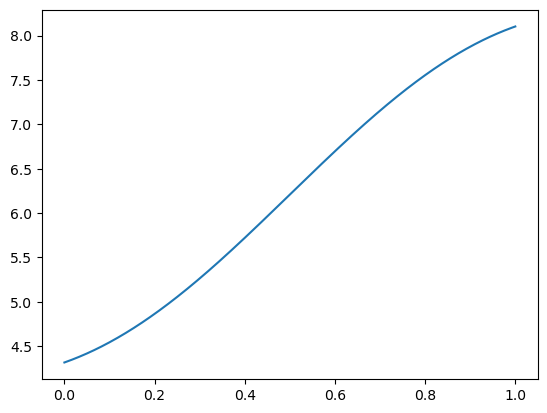

(torch.Size([500, 1]), (500, 1), (500, 1))

In [32]:
# plot
outputs = model(nodes)
outputs = outputs.detach().numpy()
u_real = u(nodes).numpy()
plt.plot(nodes.numpy(),abs(outputs-u_real))
plt.show()
nodes.shape, outputs.shape, u_real.shape

In [60]:
range(nodes.size()[0])

range(0, 500)

In [52]:
model(torch.tensor(0.5))

RuntimeError: ArrayRef: invalid index Index = 18446744073709551615; Length = 0